# Segmentation Result Evaluation

So far, we have seen few segmentation algorithms, both contextual and non-contextual. Both giving different results for sample images and different other criteria. 

The discussion so far raises a question about how do can we evaluate which segmentation output is better than others. Earlier we saw that we motivated Otsu's thresholding method using the same logic. Sum of intra-class variances is one method which gave us a good way to segment purity and it worked as an unsupervised method.

However if we have a ground truth map of the segmented result and we want to compare our segmented output with the ground truth. We can leverage other supervised techniques of evaluating weather a segmented image is good or not. The following can be some criteria which such techniques should fullfill:

- Easy to code
- Quantifiable output
- Suitable for vectorization

## Intersection Over Union (IOU)

- Simply put IOU is the ratio of intersection and union.
- Intersection and union are calculated between the segmented output and ground truth. 
- This metric ranges between 0 and 1 (both inclusive).
- 0 means the output is garbage and 1 means a perfect match.
- IOU for given segmented image = $\frac{\sum_{i=1}^{N} IOU_{i}}{N}$ . Where N is the number of segments.

The following image shows a easy to understand visualization of the IOU metric:

<figure>
    <img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png" width = 300px/>
    <figcaption style = "text-align:center">IOU Visualization. Ref: 
        <a href="https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/">PyImageSearch IOU</a>
    </figcaption>
</figure>

The following image shows different cases which result in different values of the metric:

<figure>
    <img src="http://ronny.rest/media/tutorials/localization/ZZZ_IMAGES_DIR/iou_scores.png" width = 500px/>
    <figcaption style = "text-align:center">IOU Score Comparison. Ref: 
        <a href="http://ronny.rest/tutorials/module/localization_001/iou/">Ronny Tutorials IOU</a>
    </figcaption>
</figure>

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
 def compute_iou(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
     
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
      
    # compute mean iou
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
       
    return np.mean(IoU)

## Dice Coefficient or F1-Score

- Dice Coefficient is just a bit different from IOU.
- It is the ratio of the intersection and the sum of pixels from both images.
- This metric also ranges between 0 and 1 (both inclusive).
- 0 means the output is garbage and 1 means a perfect match.

The following image shows a easy to understand visualization of the IOU metric:

<figure>
    <img src="https://miro.medium.com/max/858/1*yUd5ckecHjWZf6hGrdlwzA.png" width = 300px/>
    <figcaption style = "text-align:center">Dice Coefficient Visualization. Ref: 
        <a href="https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2">Medium Article</a>
    </figcaption>
</figure>

# Evaluating Our Examples using these Metrics

In [50]:
import cv2

In [51]:
image_1 = cv2.cvtColor(cv2.imread('..//assets//images//babatpur-1.jpg'), cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(cv2.imread('..//assets//images//bombay-1.jpg'), cv2.COLOR_BGR2RGB)

kmeans_1 = cv2.imread('..//assets//traditional_segmentation//babatpur-1_kmeans_seg.jpg')
kmeans_2 = cv2.imread('..//assets//traditional_segmentation//bombay-1_kmeans_seg.jpg')

map_1 = cv2.imread('..//assets//maps//babatpur-1_mask.jpg')
map_2 = cv2.imread('..//assets//maps//bombay-1_mask.jpg')

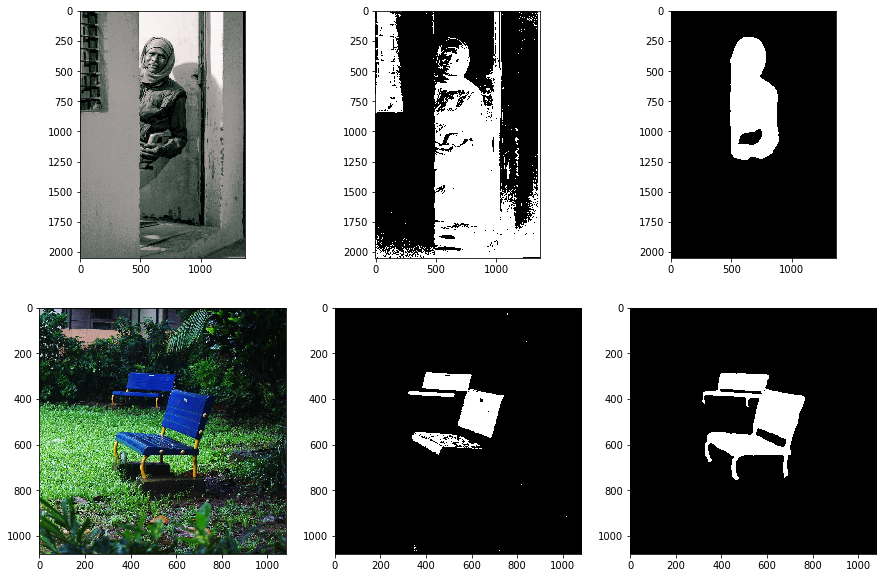

In [52]:
f, ax = plt.subplots(2, 3, figsize = (15, 10))
ax[0][0].imshow(image_1)
ax[0][1].imshow(kmeans_1)
ax[0][2].imshow(map_1)
ax[1][0].imshow(image_2)
ax[1][1].imshow(kmeans_2)
ax[1][2].imshow(map_2)
plt.show()

In [101]:
compute_iou(map_1, kmeans_1)

0.48578465719406083

In [102]:
compute_iou(map_2, kmeans_2)

0.518661296717876

# Let's Look at Some Deep Learning Results

In [113]:
i1 = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//babatpur-1.png'), cv2.COLOR_BGR2RGB)
i2 = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//bombay-1.png'), cv2.COLOR_BGR2RGB)
i3 = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//bombay-2.png'), cv2.COLOR_BGR2RGB)
i4 = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//jaipur-1.png'), cv2.COLOR_BGR2RGB)
i5 = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//jaipur-2.png'), cv2.COLOR_BGR2RGB)
i6 = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//jaipur-3.png'), cv2.COLOR_BGR2RGB)
i7 = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//lucknow-1.png'), cv2.COLOR_BGR2RGB)

In [118]:
from ipywidgets import interact
from IPython.display import display

In [124]:
# Define any function
@interact(img = [i1, i2, i3, i4, i5, i6, i7])
def f(img):
    f, ax = plt.subplots(1, 1, figsize = (10, 10))
    ax.imshow(img)
    plt.show()
#     display(img)

# Create sliders using interactive
# my_result = interactive(f, img = (i1, i2, i3, i4, i5, i6, i7))


TraitError: Invalid selection: value not found

# References

- https://github.com/HRNet/HRNet-Semantic-Segmentation
- https://arxiv.org/pdf/1911.01685.pdf
- https://github.com/bermanmaxim/LovaszSoftmax
- https://lars76.github.io/neural-networks/object-detection/losses-for-segmentation/